## Imports and read in Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gmaps
import pandas as pd

# Google developer API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

filepath = "Lane_cities.csv"
df = pd.read_csv(filepath)

df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Busselton,AU,-33.65,115.33,57.61,98,3.15,38
1,Misratah,LY,32.38,15.09,69.39,65,10.96,1
2,Qaanaaq,GL,77.48,-69.36,-12.33,70,8.90,0
3,Hobart,AU,-42.88,147.33,58.15,54,5.82,20
4,Butaritari,KI,3.07,172.79,81.34,72,11.63,92


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         587 non-null    object 
 1   Country      584 non-null    object 
 2   Latitude     587 non-null    float64
 3   Longitude    587 non-null    float64
 4   Temperature  587 non-null    float64
 5   Humidity     587 non-null    int64  
 6   Wind Speed   587 non-null    float64
 7   Cloudiness   587 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 36.8+ KB


In [3]:
df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,20.856610,22.086422,56.953101,74.156729,7.887138,48.214651
std,33.048035,87.208777,22.380837,19.162391,6.193739,39.145370
min,-54.800000,-179.170000,-27.180000,9.000000,0.310000,0.000000
25%,-7.490000,-51.910000,42.800000,65.000000,3.360000,2.000000
50%,26.330000,26.950000,62.020000,78.000000,6.580000,44.000000
75%,47.935000,96.305000,75.245000,88.000000,10.470000,90.000000
max,78.220000,179.320000,92.170000,100.000000,63.310000,100.000000


## Scatter Plots

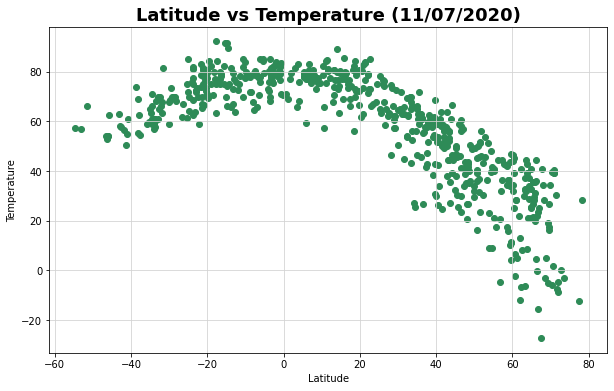

In [4]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "seagreen")
plt.title("Latitude vs Temperature (11/07/2020)", fontsize=18, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(color="lightgrey", alpha = 1)
plt.savefig("Images/Latitude vs Temperature.png")
plt.show()


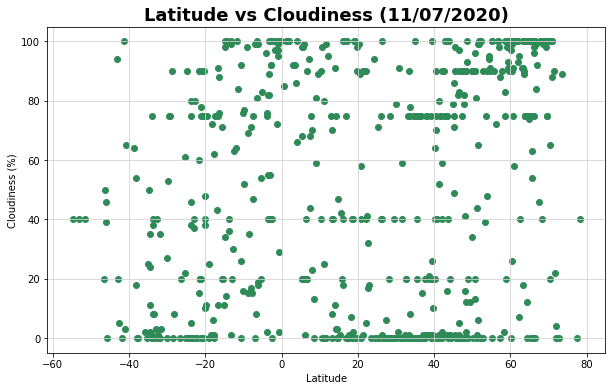

In [5]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "seagreen")
plt.title("Latitude vs Cloudiness (11/07/2020)", fontsize=18, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 1)
plt.savefig("Images/Latitude vs Cloudiness.png")
plt.show()


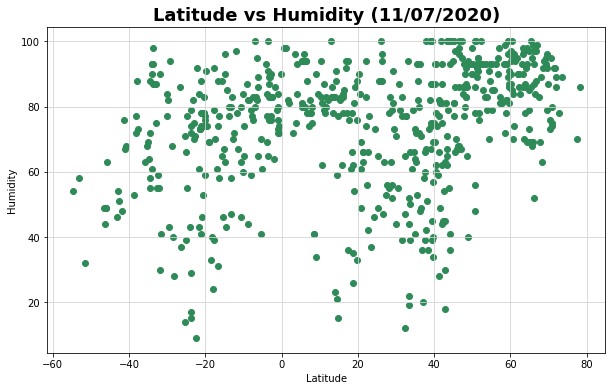

In [6]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "seagreen")
plt.title("Latitude vs Humidity (11/07/2020)", fontsize=18, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color="lightgrey", alpha = 1)
plt.savefig("Images/Latitude vs Humidity.png")
plt.show()


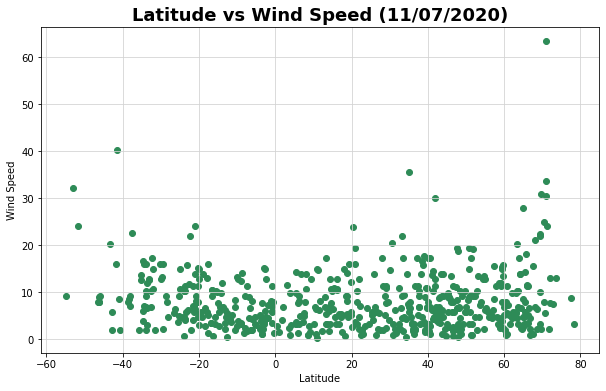

In [7]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "seagreen")
plt.title("Latitude vs Wind Speed (11/07/2020)", fontsize=18, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color="lightgrey", alpha = 1)
plt.savefig("Images/Latitude vs Wind Speed.png")
plt.show()


In [8]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]

df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness,Hemisphere_NS
0,Busselton,AU,-33.65,115.33,57.61,98,3.15,38,Southern
1,Misratah,LY,32.38,15.09,69.39,65,10.96,1,Northern
2,Qaanaaq,GL,77.48,-69.36,-12.33,70,8.90,0,Northern
3,Hobart,AU,-42.88,147.33,58.15,54,5.82,20,Southern
4,Butaritari,KI,3.07,172.79,81.34,72,11.63,92,Northern


In [9]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
Latitude,1.000000,-0.061448,-0.714877,0.288147,0.012816,0.204651
Longitude,-0.061448,1.000000,-0.103569,0.078154,-0.102973,0.052962
Temperature,-0.714877,-0.103569,1.000000,-0.296307,-0.014240,-0.153591
Humidity,0.288147,0.078154,-0.296307,1.000000,-0.101593,0.373350
Wind Speed,0.012816,-0.102973,-0.014240,-0.101593,1.000000,0.108152
Cloudiness,0.204651,0.052962,-0.153591,0.373350,0.108152,1.000000


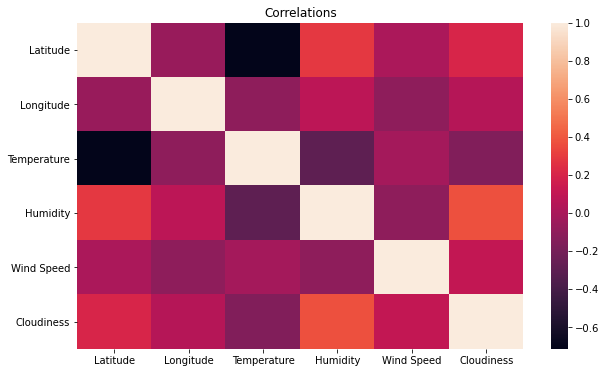

In [10]:
plt.figure(figsize=(10,6))

sns.heatmap(corrs)

plt.title("Correlations")
plt.show()

In [11]:
dfHemiN = df.loc[df["Hemisphere_NS"] == "Northern"]
dfHemiN

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness,Hemisphere_NS
1,Misratah,LY,32.38,15.09,69.39,65,10.96,1,Northern
2,Qaanaaq,GL,77.48,-69.36,-12.33,70,8.90,0,Northern
4,Butaritari,KI,3.07,172.79,81.34,72,11.63,92,Northern
7,Albany,US,42.60,-73.97,57.76,54,3.76,90,Northern
9,Fortuna,US,40.60,-124.16,53.76,62,17.22,75,Northern
...,...,...,...,...,...,...,...,...,...
581,Autun,FR,46.95,4.30,57.06,67,5.82,0,Northern
582,Tsaghkahovit,AM,40.63,44.22,33.80,74,1.12,40,Northern
583,Mogadishu,SO,2.04,45.34,79.50,81,6.93,100,Northern
585,Santa Marinella,IT,42.03,11.85,57.60,87,5.01,2,Northern


In [12]:
NHcorr=dfHemiN.corr()
NHcorr

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
Latitude,1.000000,-0.011562,-0.850528,0.247479,0.172888,0.224796
Longitude,-0.011562,1.000000,-0.171109,0.185098,-0.155107,0.057796
Temperature,-0.850528,-0.171109,1.000000,-0.289509,0.010150,-0.198496
Humidity,0.247479,0.185098,-0.289509,1.000000,-0.098033,0.395861
Wind Speed,0.172888,-0.155107,0.010150,-0.098033,1.000000,0.171989
Cloudiness,0.224796,0.057796,-0.198496,0.395861,0.171989,1.000000


In [13]:
dfHemiS = df.loc[df["Hemisphere_NS"] == "Southern"]
dfHemiS

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness,Hemisphere_NS
0,Busselton,AU,-33.65,115.33,57.61,98,3.15,38,Southern
3,Hobart,AU,-42.88,147.33,58.15,54,5.82,20,Southern
5,Gisborne,NZ,-38.65,178.00,73.99,53,8.01,64,Southern
6,Faanui,PF,-16.48,-151.75,79.20,77,10.54,76,Southern
8,Punta Arenas,CL,-53.15,-70.92,57.09,58,32.21,40,Southern
...,...,...,...,...,...,...,...,...,...
561,Santa Isabel,BR,-23.32,-46.22,63.66,82,5.82,0,Southern
564,Ilo,PE,-17.64,-71.34,63.28,79,1.32,62,Southern
573,Ambilobe,MG,-13.20,49.05,72.99,80,3.40,100,Southern
578,Bambanglipuro,ID,-7.95,110.28,79.09,79,2.51,71,Southern


In [14]:
SHcorr = dfHemiS.corr()
SHcorr

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
Latitude,1.000000,-0.100323,0.701002,0.307671,-0.395871,0.374635
Longitude,-0.100323,1.000000,-0.078553,-0.103386,0.010456,0.057484
Temperature,0.701002,-0.078553,1.000000,-0.081856,-0.251295,0.256930
Humidity,0.307671,-0.103386,-0.081856,1.000000,-0.106835,0.294387
Wind Speed,-0.395871,0.010456,-0.251295,-0.106835,1.000000,-0.060564
Cloudiness,0.374635,0.057484,0.256930,0.294387,-0.060564,1.000000


## Linear Regressions for Northern Hemispheres 

y = -1.02x + 90.58
The r-squared is: 0.7233983644171657


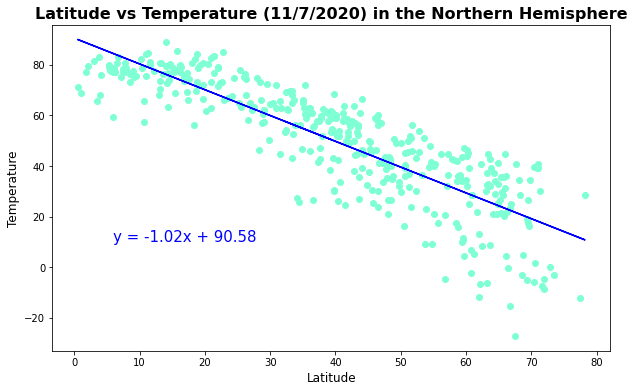

In [15]:
plt.figure(figsize=(10,6))

x_values = dfHemiN['Latitude']
y_values = dfHemiN['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Latitude vs Temperature (11/7/2020) in the Northern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.savefig("Images/Latitude vs Temperature Northern Hemisphere Regression.png")
plt.show()


y = 0.24x + 66.83
The r-squared is: 0.06124577182066753


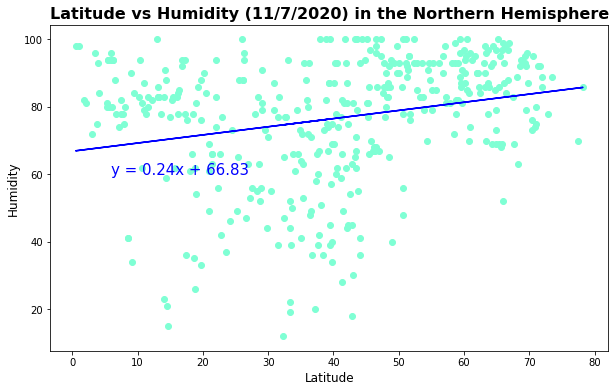

In [16]:
plt.figure(figsize=(10,6))

x_values = dfHemiN['Latitude']
y_values = dfHemiN['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(6,60),fontsize=15,color="blue")
plt.title("Latitude vs Humidity (11/7/2020) in the Northern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.savefig("Images/Latitude vs Humidity Northern Hemisphere Regression.png")
plt.show()


y = 0.47x + 31.53
The r-squared is: 0.05053308528469568


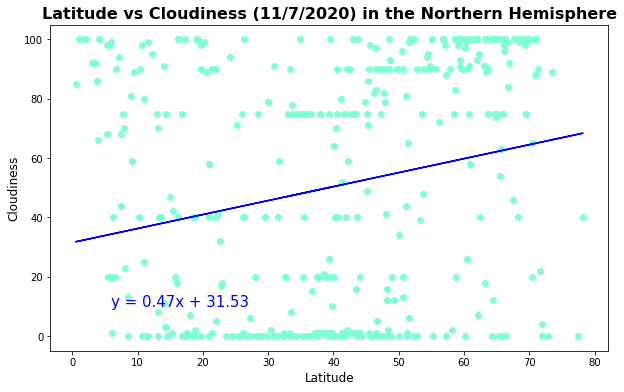

In [17]:
plt.figure(figsize=(10,6))

x_values = dfHemiN['Latitude']
y_values = dfHemiN['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Latitude vs Cloudiness (11/7/2020) in the Northern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.savefig("Images/Latitude vs Cloudiness Northern Hemisphere Regression.png")
plt.show()


y = 0.06x + 5.51
The r-squared is: 0.029890224013068217


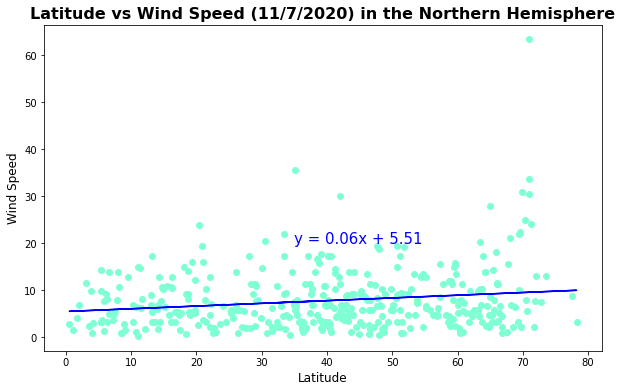

In [18]:
plt.figure(figsize=(10,6))

x_values = dfHemiN['Latitude']
y_values = dfHemiN['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(35,20),fontsize=15,color="blue")
plt.title("Latitude vs Wind Speed (11/7/2020) in the Northern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.savefig("Images/Latitude vs Wind Speed Northern Hemisphere Regression.png")
plt.show()


## Linear Regression for Southern Hemisphere 

y = 0.48x + 81.85
The r-squared is: 0.4914042134228416


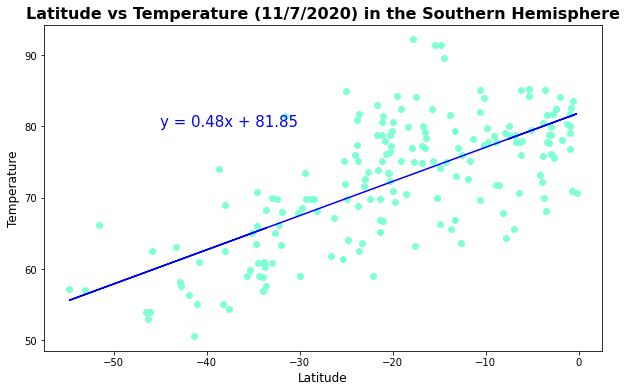

In [19]:
plt.figure(figsize=(10,6))

x_values = dfHemiS['Latitude']
y_values = dfHemiS['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-45,80),fontsize=15,color="blue")
plt.title("Latitude vs Temperature (11/7/2020) in the Southern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.savefig("Images/Latitude vs Temperature Southern Hemisphere Regression.png")
plt.show()


y = 0.45x + 77.99
The r-squared is: 0.09466151828654232


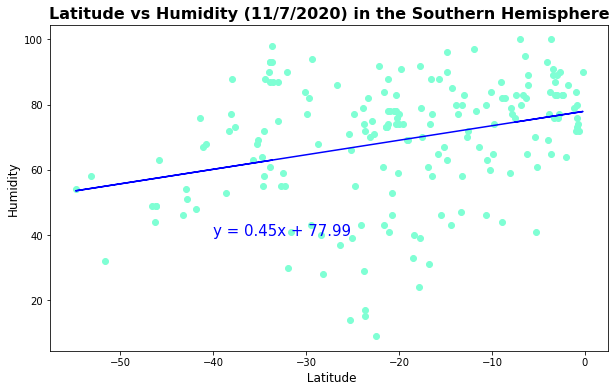

In [20]:
plt.figure(figsize=(10,6))

x_values = dfHemiS['Latitude']
y_values = dfHemiS['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-40,40),fontsize=15,color="blue")
plt.title("Latitude vs Humidity (11/7/2020) in the Southern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel(' Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.savefig("Images/Latitude vs Humidity Southern Hemisphere Regression.png")
plt.show()


y = 1.03x + 64.13
The r-squared is: 0.1403516720691378


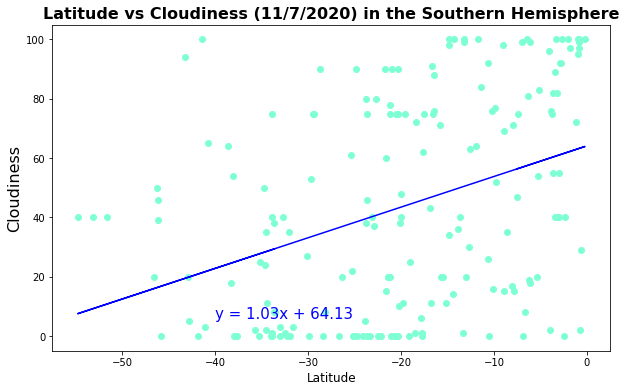

In [21]:
plt.figure(figsize=(10,6))

x_values = dfHemiS['Latitude']
y_values = dfHemiS['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values,  c="aquamarine")
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-40,6),fontsize=15,color="blue")
plt.title("Latitude vs Cloudiness (11/7/2020) in the Southern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=16)
plt.savefig("Images/Latitude vs Cloudiness Southern Hemisphere Regression.png")
plt.show()

y = -0.17x + 4.57
The r-squared is: 0.1567138044392246


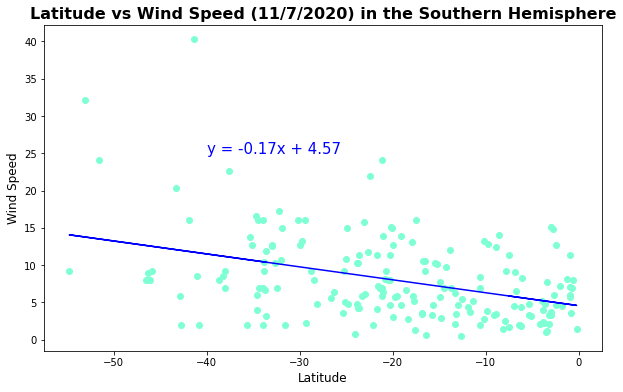

In [22]:
plt.figure(figsize=(10,6))

x_values = dfHemiS['Latitude']
y_values = dfHemiS['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values, c="aquamarine" )
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-40,25),fontsize=15,color="blue")
plt.title("Latitude vs Wind Speed (11/7/2020) in the Southern Hemisphere", fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.savefig("Images/Latitude vs Wind Speed Southern Hemisphere Regression.png")
plt.show()
